In [1]:
import numpy as np
import tensorflow as tf # only these two packages required
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, shape=(None))
y = tf.square(x)

In [4]:
y

<tf.Tensor 'Square:0' shape=<unknown> dtype=float32>

In [5]:
sess = tf.InteractiveSession()

In [6]:
y.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  1.,   4.,   9.,  16.,  25.], dtype=float32)

In [7]:
# define the gradients of y with respect to x
dy_dx = tf.squeeze(tf.stack(tf.gradients(y, x)))

In [8]:
dy_dx

<tf.Tensor 'Squeeze:0' shape=<unknown> dtype=float32>

In [9]:
dy_dx.eval(feed_dict={x: 4})

8.0

In [10]:
dy_dx.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  2.,   4.,   6.,   8.,  10.], dtype=float32)

In [11]:
g = 9.8; mu = 0.0

In [12]:
acceleration = (g * (dy_dx)) / tf.sqrt(1 + tf.square(dy_dx))

In [13]:
acceleration.eval(feed_dict={x: 100})

9.7998772

# Define the simulation for these values

In [14]:
start_position = 300

# In this update definition, the dt (i.e. small time interval) has been defined to remain at a default value of 1 sec. 

In [15]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(600):
    print "X = " + str(position) + " V = " + str(velocity)
    y_value, a = sess.run((y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + a
    position = position - (velocity + (a / 2))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999

X = 285.300021172 V = 9.79998588562
obtained_acceleration = 9.79998

X = 260.800057888 V = 19.5999708176
obtained_acceleration = 9.79998

X = 226.500113964 V = 29.3999528885
obtained_acceleration = 9.79998

X = 182.400196552 V = 39.1999292374
obtained_acceleration = 9.79996

X = 128.500321388 V = 48.9998931885
obtained_acceleration = 9.79993

X = 64.8005394936 V = 58.7998189926
obtained_acceleration = 9.79971

X = -8.69884204865 V = 68.599527359
obtained_acceleration = -9.78385

X = -62.6225905418 V = 58.8156747818
obtained_acceleration = -9.79969

X = -106.738734245 V = 49.0159873962
obtained_acceleration = -9.79989

X = -141.054883003 V = 39.2160949707
obtained_acceleration = -9.79994

X = -165.571070671 V = 29.4161567688
obtained_acceleration = -9.79996

X = -180.287294388 V = 19.6162014008
obtained_acceleration = -9.79996

X = -185.203551292 V = 9.81623840332
obtained_acceleration = -9.79996

X = -180.319842339 V = 0.0162734985352
obta

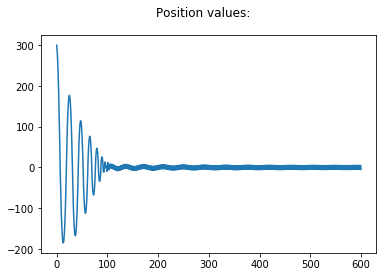

In [16]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

In [17]:
position

-4.7893791198730469

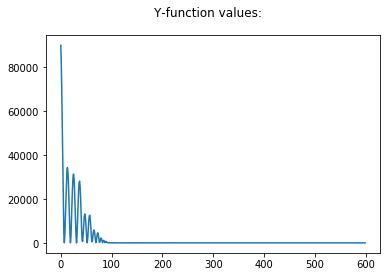

In [18]:
plt.figure().suptitle("Y-function values:")
plt.plot(y_values);

# As you can see, due to the constant dt definition, the algorithm comes to a state where it keeps oscillating between a small but fixed set of values.
-------------------------------------------------------------------------------------------------------------------
# This is somewhat a desired behaivour, however, the final oscillation range must be as small as possible.
-------------------------------------------------------------------------------------------------------------------
# I need to work out a possible solution for this problem. I am considering two possible solutions:
<ol> 
    <li> <h3> Setting a defalut value of, say epsilon, as a window of allowed final oscillation. </h3> </li>
    <li> <h3> Defining the dt as a function of slope. This is a bit hacky since we are messing with the time dimension here. It makes us feel like some higher dimensional beings though! And, it is cool. </h3> </li>
</ol>

# I find the 2nd solution more appealing, so will work on that first.

# Make dt => directly proportional to dy_dx and apply an upper limit on it. 
-------------------------------------------------------------------------------------------------------------------
I am making the upper limit to be 1. i.e the dt will never exceed 1. By doing this I think, the time will become slower as it reaches the portion of less slope

In [19]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(600):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = min(abs(slope), 1)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999
X = 285.300021172 V = 9.79998588562
obtained_acceleration = 9.79998
X = 260.800057888 V = 19.5999708176
obtained_acceleration = 9.79998
X = 226.500113964 V = 29.3999528885
obtained_acceleration = 9.79998
X = 182.400196552 V = 39.1999292374
obtained_acceleration = 9.79996
X = 128.500321388 V = 48.9998931885
obtained_acceleration = 9.79993
X = 64.8005394936 V = 58.7998189926
obtained_acceleration = 9.79971
X = -8.69884204865 V = 68.599527359
obtained_acceleration = -9.78385
X = -62.6225905418 V = 58.8156747818
obtained_acceleration = -9.79969
X = -106.738734245 V = 49.0159873962
obtained_acceleration = -9.79989
X = -141.054883003 V = 39.2160949707
obtained_acceleration = -9.79994
X = -165.571070671 V = 29.4161567688
obtained_acceleration = -9.79996
X = -180.287294388 V = 19.6162014008
obtained_acceleration = -9.79996
X = -185.203551292 V = 9.81623840332
obtained_acceleration = -9.79996
X = -180.319842339 V = 0.0162734985352
obtained_accelerat

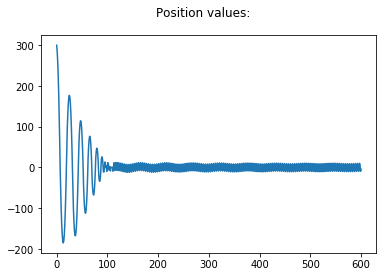

In [20]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

In [21]:
position

-4.343942434633254

Seems like this didn't make a difference. Well it actually makes sense. I have defined the behaviour such that the time starts to get slower only after encountering a slope value of 1. Now, quite simply, the slope value of 1 will be attained only at x = 0.5. And the ball seems to oscillate in these values: 9.4 -> 4.5 -> -9.4 -> -4.5 and so on. It is never reaching x = 0.5.

-------------------------------------------------------------------------------------------------------------------
So, either I'll have to set a higher limit or remove the limit altogether. I am not really a fan of custom fitting a higher limit for this particular problem that might change in some other problem. If I do that, I'll be back to square one. The main goal of universalizing the learning rate remains as it is

## Removing the upper limit on the slope. This might make the network a bit drastic. With this, what happens is that time goes faster on steep slopes and hopefully becomes slower on gentle slopes

# dt is the absoulte value of the current slope

In [22]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(1000):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = abs(slope)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999
Current dt = 600.0 Current slope = 600.0

X = -5291692.47894 V = 5879.99169922
obtained_acceleration = -9.8
Current dt = 1.05834e+07 Current slope = -1.05834e+07

X = 1.64645596638e+15 V = -103711296.008
obtained_acceleration = 9.8
Current dt = 3.29291e+15 Current slope = 3.29291e+15

X = -1.59396058679e+32 V = 3.22705373225e+16
obtained_acceleration = -0.0
Current dt = 3.18792e+32 Current slope = -3.18792e+32

X = -1.02875928077e+49 V = 3.22705373225e+16
obtained_acceleration = nan
Current dt = inf Current slope = -inf

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
o

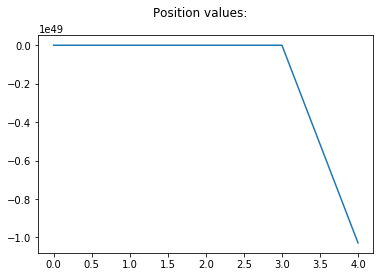

In [23]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

This behaivour was indeed a bit expected. The ball shot off to great lengths. The friction was as if not there. So, the dt cannot be directly proportional to the slope. Perhaps some slow growing function of the slope like log?

# lets try dt as log(dy_dx)

In [24]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(300):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = np.log(abs(slope))
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999
Current dt = 6.39693 Current slope = 600.0

X = -301.533560516 V = 62.6898193359
obtained_acceleration = -9.79999
Current dt = 6.40203 Current slope = -603.067

X = -100.382697106 V = -0.0499687194824
obtained_acceleration = -9.79988
Current dt = 5.30214 Current slope = -200.765

X = 313.133149565 V = -52.0102653503
obtained_acceleration = 9.79999
Current dt = 6.43978 Current slope = 626.266

X = 38.4489236533 V = 11.0994567871
obtained_acceleration = 9.79917
Current dt = 4.34248 Current slope = 76.8979

X = -286.926353715 V = 53.652141571
obtained_acceleration = -9.79999
Current dt = 6.35237 Current slope = -573.853

X = -34.5618217824 V = -8.60102081299
obtained_acceleration = -9.79897
Current dt = 4.2359 Current slope = -69.1236

X = 265.603084741 V = -50.1084671021
obtained_acceleration = 9.79998
Current dt = 6.27515 Current slope = 531.206

X = 1.19277871173 V = 11.3879051208
obtained_acceleration = 9.03804
Current dt = 0.869433 Curren

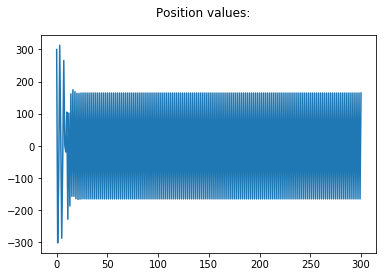

In [25]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

Damn! it stopped to some even worse equilibrium 

# Now this reminds me of a function that might exactly be what I am looking for. Could this be it? Yes I am thinking of tanh function.

We are already considering only the absolute values of slope. Thus, We will be in the positive domain of the tanh function only

In [26]:
def synthetic_function(x, a):
    '''
        calculates a synthetic function of the given x. for a value of a
    '''
    x, a = float(x), float(a) # just to make sure that we always get good precision
    y = np.sqrt(1 - ((a ** 2) / ((np.abs(x) + a) ** 2)))
        
    return y

/home/animesh/Programming/platforms/anaconda3/envs/snakes/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


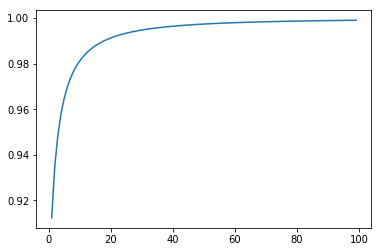

In [27]:
plot_values = [synthetic_function(val, np.log(abs(val) + 1)) for val in range(100)]
plt.plot(plot_values);

In [28]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [238]:
start_position = 1000

In [239]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for cur_step in range(400):
    print "current_step: " + str(cur_step)
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = min(np.log(np.abs(slope) + 1), 0.8)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

current_step: 0
X = 1000 V = 0
obtained_acceleration = -0.00979999755
Current dt = 0.8 Current slope = 2000.0

current_step: 1
X = 1000.009408 V = -0.00783999804
obtained_acceleration = -0.00979990535256
Current dt = 0.8 Current slope = 2000.018816

current_step: 2
X = 1000.02508791 V = -0.015679922322
obtained_acceleration = -0.00979975169488
Current dt = 0.8 Current slope = 2000.05017581

current_step: 3
X = 1000.0470396 V = -0.023519723678
obtained_acceleration = -0.0097995365839
Current dt = 0.8 Current slope = 2000.09407921

current_step: 4
X = 1000.07526294 V = -0.0313593529451
obtained_acceleration = -0.00979926002926
Current dt = 0.8 Current slope = 2000.15052588

current_step: 5
X = 1000.10975771 V = -0.0391987609685
obtained_acceleration = -0.00979892204329
Current dt = 0.8 Current slope = 2000.21951542

current_step: 6
X = 1000.15052368 V = -0.0470378986031
obtained_acceleration = -0.00979852264101
Current dt = 0.8 Current slope = 2000.30104737

current_step: 7
X = 1000.1975

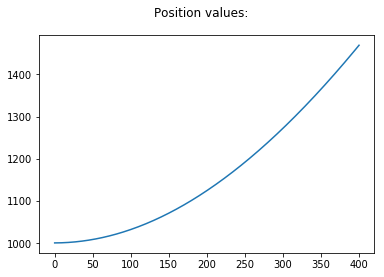

In [240]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

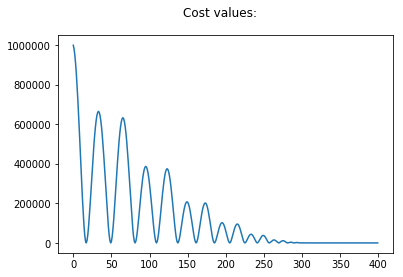

In [33]:
plt.figure().suptitle("Cost values:")
plt.plot(y_values);

In [34]:
print position

-4.61805354055e-17


## All this trial and error made me rethink on my basic idea, and, it lead me to the fact that I made a small error in finding the net force on the particle while sliding. I am going to redo the whole thing from here onwards

In [192]:
sess.close() # close the earlier session

In [193]:
tf.reset_default_graph() # reset the earlier graph

In [194]:
# define the placeholder for the input:
x = tf.placeholder(tf.float64, shape=(None))

In [195]:
# define the y function
y = tf.square(x)

In [196]:
# define the dy_dx here:
dy_dx = tf.squeeze(tf.stack(tf.gradients(y, x))) # gradients returns a list, so first stack it and then squeeze it

### Define the g and the mu values here:

In [197]:
g = 9.8

In [198]:
# define the acceleration here:
acceleration = -(2 * g * (dy_dx)) / (1 + tf.square(dy_dx)) # this is the changed accelaration
# this term corresponds to: accn = g * cos(x) * sin(x) 
# This accounts for the slope and it's fundamental nature of pulling the body towards the center

Let's check a few values before running the experiment

In [199]:
sess = tf.InteractiveSession() # create a fresh new session

In [200]:
# check if y is giving correct values:
print y.eval(feed_dict={x: 3}) # should return 256

9.0


In [201]:
# check if dy_dx is giving correct values:
print dy_dx.eval(feed_dict={x: 3}) # should return 32 (since slope = 2x)

6.0


In [202]:
# check if the acceleration is giving consisten values:
print acceleration.eval(feed_dict={x: 0.4}) # Ok, I have checked on calculator and this does make sense

-9.56097560976


### Run the simulation:

# I see that the velocity is causing some problems for convergence. It's overshooting because the velocity becomes too high at the the convergence point. perhaps, it is inversely proportional to the time interval? (One insight is that the velocity is actually in this case also equal to the momentum since the mass of the ball is 1 [unit mass]).

In [254]:
# temporarily change 
start_position = 0.02; g = 9.8; epsilon = 1

In [255]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

limit = 500

cur_step = 0; done = False
while(not done):
    print "current_step: " + str(cur_step)
    print "X = " + str(position) + " V = " + str(velocity)
    slope, prev_y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    print "Current slope = " + str(slope) 
    
    # define dt (interval of time as a function of the slope:)
    dt = 1 # (np.square(slope) / (1 + np.square(slope)))
    # time interval is linearly proportional to the slope of the land
    
    print "Current dt = " + str(dt) + "\n"
    
    # calculate the old (main_projected) velocity
    old_velocity = velocity * np.sqrt(1 + np.square(slope))
    
    # now update the velocity and the position
    position = position + ((velocity * dt) + ((a / 2) * (dt ** 2)))
    new_slope, new_y_value = sess.run((dy_dx, y), feed_dict={x: position})
    
    velocity = (np.sign(velocity + (a * dt)) * 
                    (np.sqrt(max((np.square(old_velocity) + (2 * g * (prev_y_value - new_y_value))), 0)))) / np.sqrt(1 + np.square(new_slope))
    
    x_values.append(position); y_values.append(y_value)
    
    if(dt == 0 or cur_step == limit):
        done = True
    
    # increment the current_step
    cur_step += 1

current_step: 0
X = 0.02 V = 0
obtained_acceleration = -0.782747603834
Current slope = 0.04
Current dt = 1

current_step: 1
X = -0.371373801917 V = -0.0
obtained_acceleration = 9.38203063723
Current slope = -0.742747603834
Current dt = 1

current_step: 2
X = 4.3196415167 V = 0.0
obtained_acceleration = -2.23871219569
Current slope = 8.63928303339
Current dt = 1

current_step: 3
X = 3.20028541885 V = -1.98272932394
obtained_acceleration = -2.98925990829
Current slope = 6.40057083771
Current dt = 1

current_step: 4
X = -0.277073859232 V = -16.6928102655
obtained_acceleration = 8.30958918018
Current slope = -0.554147718463
Current dt = 1

current_step: 5
X = -12.8150895346 V = -0.0
obtained_acceleration = 0.763561130834
Current slope = -25.6301790693
Current dt = 1

current_step: 6
X = -12.4333089692 V = 0.552311710221
obtained_acceleration = 0.786932662126
Current slope = -24.8666179385
Current dt = 1

current_step: 7
X = -11.4875309279 V = 1.09348734488
obtained_acceleration = 0.8514857

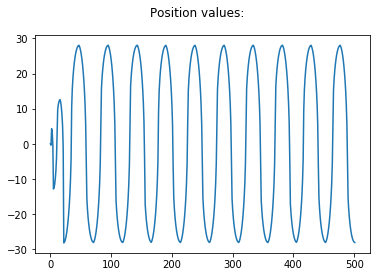

In [256]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

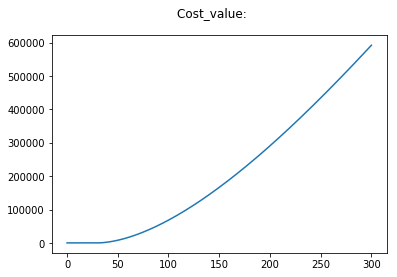

In [48]:
plt.figure().suptitle("Cost_value: ")
plt.plot(y_values);

In [49]:
y_values[-1]

592350.48673659749

In [50]:
position

-771.76732163778911